### MODIS cloud fraction and GDD

### UCL

#### Feng Yin

In this nodebook, we will look at how to pull cloud data from NASA website with python and play around with different other datasets, like global land cover and global shorelines. Then we use the temprature data to get the GDD. Comobining these two datasets, we get a global clear days map over the GDD over 0, which basically a global clear days over vegetation growth period.

#### MODIS cloud fraction

We want to get some [cloud fraction](https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MODAL2_M_CLD_FR&date=2016-01-01) data from NASA, and it has to be ordered by clicking it one by one. It is a pain to do that, so we want to download some test data and see whether we can easily generate a code to download it easily.

If we download the data with the browser, it can give you the download link after you get the data, and the following two links are those I used to download the data:

https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=1699638&cs=rgb&format=FLOAT.TIFF&width=3600&height=1800

https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=1701588&cs=rgb&format=FLOAT.TIFF&width=3600&height=1800

They have very similar parten and the only difference is the 'si= ', which cannot be easily connected to the date of data but which actually related to the date and they may have some key point to that. Thus, we have to find the key. Instead of find the key by asking people who design the website....(they generally will not tell you...), we can get it by reading the page:

https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MODAL2_M_CLD_FR&date=2016-01-01

and see what we can get from there.

In [1]:
import urllib2
import os

In [2]:
year, month, date = 2016,12,1

In [3]:
mod_url = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MODAL2_M_CLD_FR&date=%d-%02d-%02d'%(year, month, date)
myd_url = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MYDAL2_M_CLD_FR&date=%d-%02d-%02d'%(year, month, date)
print mod_url,'\n', myd_url # generate the urls

https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MODAL2_M_CLD_FR&date=2016-12-01 
https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MYDAL2_M_CLD_FR&date=2016-12-01


In [4]:
# with some simple test we find out the 'a onclick="viewDataset' is an indication 
# of keys...by simply finding the unique number like '1699638' in the read in text..
req = urllib2.urlopen(mod_url)
keys = []
for i in req.read().split('\n'):
    if 'a onclick="viewDataset' in i: 
        keys.append(i)
        print i, '\n'
        

        <div class="slider-elem month" id="2016-01-01"><a onclick="viewDataset('1699638','2016-01-01');" href="javascript:void(0);">January 2016</a></div> 

        <div class="slider-elem month" id="2016-02-01"><a onclick="viewDataset('1701462','2016-02-01');" href="javascript:void(0);">February 2016</a></div> 

        <div class="slider-elem month" id="2016-03-01"><a onclick="viewDataset('1701588','2016-03-01');" href="javascript:void(0);">March 2016</a></div> 

        <div class="slider-elem month" id="2016-04-01"><a onclick="viewDataset('1702911','2016-04-01');" href="javascript:void(0);">April 2016</a></div> 

        <div class="slider-elem month" id="2016-05-01"><a onclick="viewDataset('1704011','2016-05-01');" href="javascript:void(0);">May 2016</a></div> 

        <div class="slider-elem month" id="2016-06-01"><a onclick="viewDataset('1705081','2016-06-01');" href="javascript:void(0);">June 2016</a></div> 

        <div class="slider-elem month" id="2016-07-01"><a onclick="v

Now, we get all of the keys and what we need to do is to generate the download links...

In [5]:
req = urllib2.urlopen(mod_url)
temp = 'https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=%s&&cs=gs&format=FLOAT.TIFF&width=3600&height=1800' 
for j in [mod_url, myd_url]:
    req = urllib2.urlopen(j)
    for i in req.read().split('\n'):
        if 'a onclick="viewDataset' in i: 
            si, date = i.split('viewDataset(')[1].split('''\'''')[1],i.split('viewDataset(')[1].split('''\'''')[3]
            print si, date
            filename = j.split('=')[1].split('&')[0]+'_' +date+'_gs_3600x1800.FLOAT.TIFF'
            if os.path.isfile('data/'+filename):
                print 'Finished: '+filename+'\n'
            else:    
                print 'Downloading: ' + filename, 
                print 'From: ', temp%(si)
                down_url = temp%(si)
                u = urllib2.urlopen(down_url)
                f = open('data/'+filename, 'wb')
                f.write(u.read())
                f.close()
                print 'Finished: '+filename+'\n'

1699638 2016-01-01
Finished: MODAL2_M_CLD_FR_2016-01-01_gs_3600x1800.FLOAT.TIFF

1701462 2016-02-01
Finished: MODAL2_M_CLD_FR_2016-02-01_gs_3600x1800.FLOAT.TIFF

1701588 2016-03-01
Finished: MODAL2_M_CLD_FR_2016-03-01_gs_3600x1800.FLOAT.TIFF

1702911 2016-04-01
Finished: MODAL2_M_CLD_FR_2016-04-01_gs_3600x1800.FLOAT.TIFF

1704011 2016-05-01
Finished: MODAL2_M_CLD_FR_2016-05-01_gs_3600x1800.FLOAT.TIFF

1705081 2016-06-01
Finished: MODAL2_M_CLD_FR_2016-06-01_gs_3600x1800.FLOAT.TIFF

1706123 2016-07-01
Finished: MODAL2_M_CLD_FR_2016-07-01_gs_3600x1800.FLOAT.TIFF

1707262 2016-08-01
Finished: MODAL2_M_CLD_FR_2016-08-01_gs_3600x1800.FLOAT.TIFF

1708575 2016-09-01
Finished: MODAL2_M_CLD_FR_2016-09-01_gs_3600x1800.FLOAT.TIFF

1709456 2016-10-01
Finished: MODAL2_M_CLD_FR_2016-10-01_gs_3600x1800.FLOAT.TIFF

1710300 2016-11-01
Finished: MODAL2_M_CLD_FR_2016-11-01_gs_3600x1800.FLOAT.TIFF

1711547 2016-12-01
Finished: MODAL2_M_CLD_FR_2016-12-01_gs_3600x1800.FLOAT.TIFF

1699488 2016-01-01
Finished:

We have been able to download MODIS aqua and terra cloud for year 2016, so we can download all the other years....

In [6]:
years = range(2003, 2017)
month,dat=1,1
for year in years:
    mod_url = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MODAL2_M_CLD_FR&date=%d-%02d-%02d'%(year, month, dat)
    myd_url = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MYDAL2_M_CLD_FR&date=%d-%02d-%02d'%(year, month, dat)
    for j in [mod_url, myd_url]:
        req = urllib2.urlopen(j)
        for i in req.read().split('\n'):
            if 'a onclick="viewDataset' in i: 
                si, date = i.split('viewDataset(')[1].split('''\'''')[1],i.split('viewDataset(')[1].split('''\'''')[3]
                print si, date
                filename = j.split('=')[1].split('&')[0]+'_' +date+'_gs_3600x1800.FLOAT.TIFF'
                if os.path.isfile('data/'+filename):
                    print 'Finished: '+filename+'\n'
                else:    
                    print 'Downloading: ' + filename, 
                    print 'From: ', temp%(si)
                    down_url = temp%(si)
                    u = urllib2.urlopen(down_url)
                    f = open('data/'+filename, 'wb')
                    f.write(u.read())
                    f.close()
                    print 'Finished: '+filename+'\n'

1617658 2003-01-01
Finished: MODAL2_M_CLD_FR_2003-01-01_gs_3600x1800.FLOAT.TIFF

1617661 2003-02-01
Finished: MODAL2_M_CLD_FR_2003-02-01_gs_3600x1800.FLOAT.TIFF

1617664 2003-03-01
Finished: MODAL2_M_CLD_FR_2003-03-01_gs_3600x1800.FLOAT.TIFF

1617667 2003-04-01
Finished: MODAL2_M_CLD_FR_2003-04-01_gs_3600x1800.FLOAT.TIFF

1617670 2003-05-01
Finished: MODAL2_M_CLD_FR_2003-05-01_gs_3600x1800.FLOAT.TIFF

1617673 2003-06-01
Finished: MODAL2_M_CLD_FR_2003-06-01_gs_3600x1800.FLOAT.TIFF

1617676 2003-07-01
Finished: MODAL2_M_CLD_FR_2003-07-01_gs_3600x1800.FLOAT.TIFF

1617679 2003-08-01
Finished: MODAL2_M_CLD_FR_2003-08-01_gs_3600x1800.FLOAT.TIFF

1617682 2003-09-01
Finished: MODAL2_M_CLD_FR_2003-09-01_gs_3600x1800.FLOAT.TIFF

1617685 2003-10-01
Finished: MODAL2_M_CLD_FR_2003-10-01_gs_3600x1800.FLOAT.TIFF

1617652 2003-11-01
Finished: MODAL2_M_CLD_FR_2003-11-01_gs_3600x1800.FLOAT.TIFF

1617815 2003-12-01
Finished: MODAL2_M_CLD_FR_2003-12-01_gs_3600x1800.FLOAT.TIFF

1657048 2003-01-01
Finished:

The reason why I started in 2003 is because aqua started to work in July of 2002...

In [9]:
import glob
import gdal
import pylab as plt
%matplotlib inline
fnames = sorted(glob.glob('data/M*.TIFF'))

In [12]:
import numpy.ma as ma
for i in fnames:
    plt.figure()
    data = gdal.Open(i).ReadAsArray()
    mask = data>1
    plt.imshow(ma.array(data, mask=mask), vmin=0, vmax=1, interpolation='None', cmap=plt.get_cmap('Blues'))
    plt.title('%s %s'%(i.split('_M_CLD_FR_')[0].split('/')[-1], i.split('_M_CLD_FR_')[1].split('_')[0]))
    plt.colorbar(shrink=0.5)
    plt.savefig('%s.png'%i.split('/')[1].split('.')[0])
    plt.close()

![](image/MYDAL2_M_CLD_FR_2016.gif)
![](image/MYDAL2_M_CLD_FR_2015.gif)
![](image/MYDAL2_M_CLD_FR_2014.gif)
![](image/MYDAL2_M_CLD_FR_2013.gif)
![](image/MYDAL2_M_CLD_FR_2012.gif)
![](image/MYDAL2_M_CLD_FR_2011.gif)
![](image/MYDAL2_M_CLD_FR_2010.gif)
![](image/MYDAL2_M_CLD_FR_2009.gif)
![](image/MYDAL2_M_CLD_FR_2008.gif)
![](image/MYDAL2_M_CLD_FR_2007.gif)
![](image/MYDAL2_M_CLD_FR_2006.gif)
![](image/MYDAL2_M_CLD_FR_2005.gif)
![](image/MYDAL2_M_CLD_FR_2004.gif)
![](image/MYDAL2_M_CLD_FR_2003.gif)

![](image/MODAL2_M_CLD_FR_2016.gif)
![](image/MODAL2_M_CLD_FR_2015.gif)
![](image/MODAL2_M_CLD_FR_2014.gif)
![](image/MODAL2_M_CLD_FR_2013.gif)
![](image/MODAL2_M_CLD_FR_2012.gif)
![](image/MODAL2_M_CLD_FR_2011.gif)
![](image/MODAL2_M_CLD_FR_2010.gif)
![](image/MODAL2_M_CLD_FR_2009.gif)
![](image/MODAL2_M_CLD_FR_2008.gif)
![](image/MODAL2_M_CLD_FR_2007.gif)
![](image/MODAL2_M_CLD_FR_2006.gif)
![](image/MODAL2_M_CLD_FR_2005.gif)
![](image/MODAL2_M_CLD_FR_2004.gif)
![](image/MODAL2_M_CLD_FR_2003.gif)

In [3]:
years = range(2003,2017)
cloud =[]
for year in years:
    mod = sorted(glob.glob('data/MODAL2_M_CLD_FR_%d-*.TIFF'%(year)))
    myd = sorted(glob.glob('data/MYDAL2_M_CLD_FR_%d-*.TIFF'%(year)))
    data = [[gdal.Open(i).ReadAsArray() for i in mod],[gdal.Open(i).ReadAsArray() for i in myd]]
    cloud.append(data)

In [4]:
import numpy as np
cloud = np.array(cloud)

In [16]:
cloud.shape # 14 years terra and aqua monthly cloud fraction data 

(14, 2, 12, 1800, 3600)

In [5]:
annualcloud = cloud.mean(axis = 2)

/home/ucfafyi/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


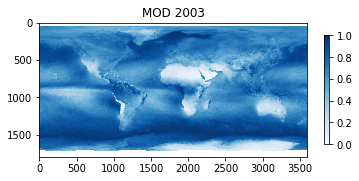

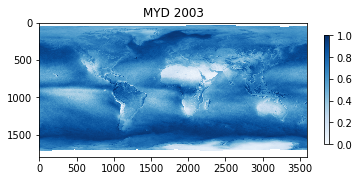

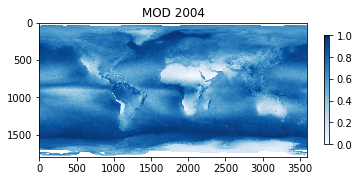

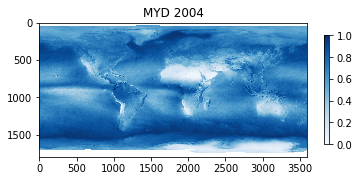

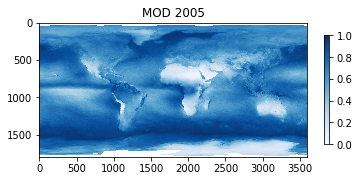

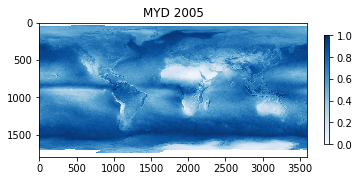

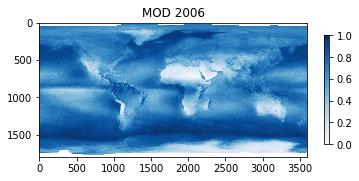

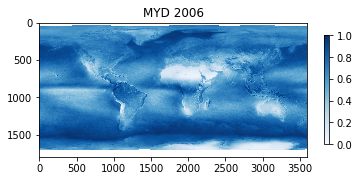

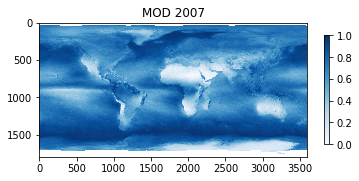

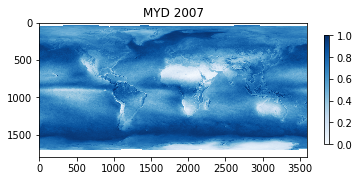

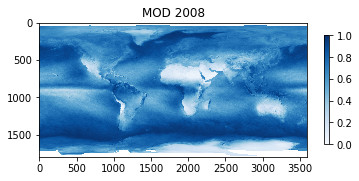

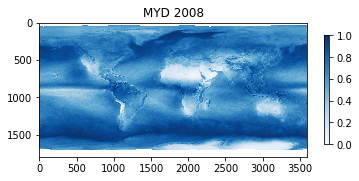

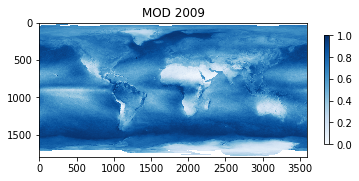

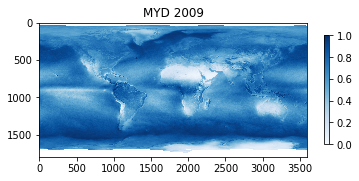

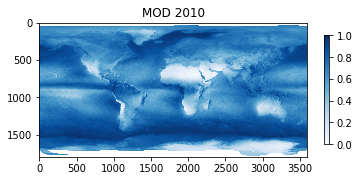

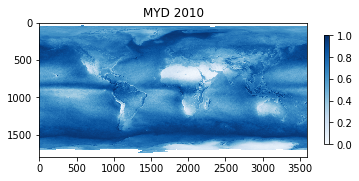

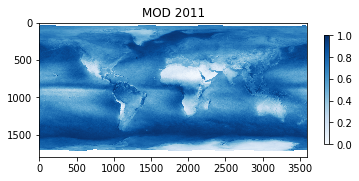

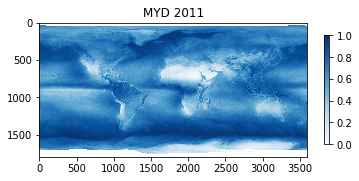

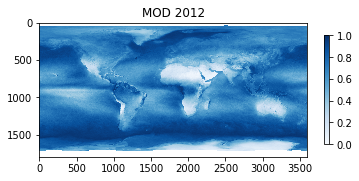

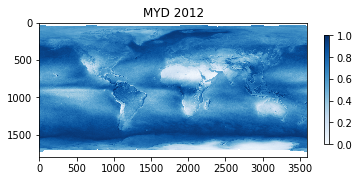

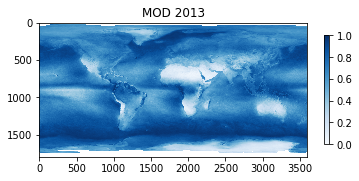

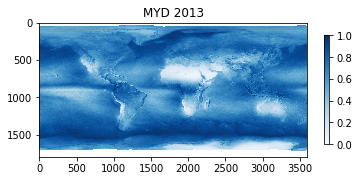

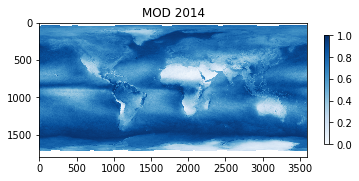

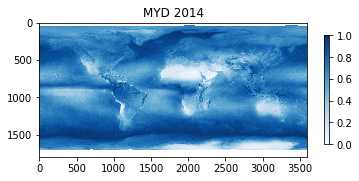

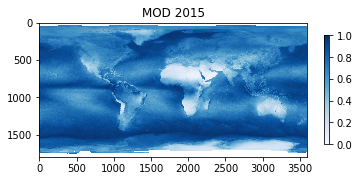

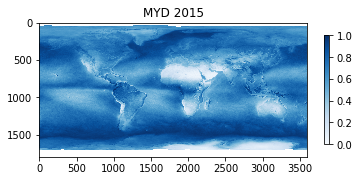

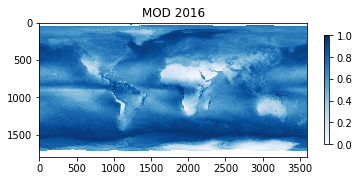

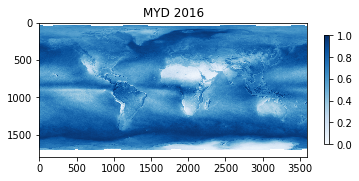

In [18]:
for _,i in enumerate(annualcloud):
    plt.figure()
    mask = i[0]>1
    plt.imshow(ma.array(i[0], mask=mask), vmin=0, vmax=1, interpolation='None', cmap=plt.get_cmap('Blues'))
    plt.colorbar(shrink=0.5)
    plt.title('MOD %d'%years[_])
    plt.savefig('image/MOD %d.png'%years[_])
    plt.figure()
    mask = i[1]>1
    plt.imshow(ma.array(i[1], mask=mask), vmin=0, vmax=1, interpolation='None', cmap=plt.get_cmap('Blues'))
    plt.colorbar(shrink=0.5)
    plt.title('MYD %d'%years[_])
    plt.savefig('image/MYD %d.png'%years[_])

In [ ]:
#!convert -delay 50 -loop 0 image/MOD\ 20*.png image/MOD_cloud.gif

In [ ]:
#!convert -delay 50 -loop 0 image/MYD\ 20*.png image/MYD_cloud.gif

![](image/MOD_cloud.gif)
![](image/MYD_cloud.gif)

Now we get the annual mean of cloud fraction over 2003 to 2016 from modis monthly products.. And we can get the std as well...

In [6]:
annualcloud_std = cloud.std(axis = 2)

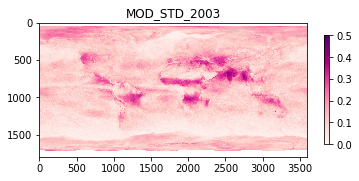

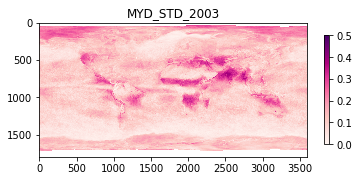

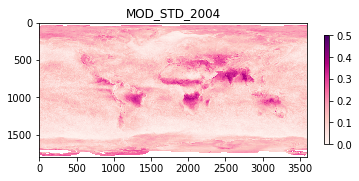

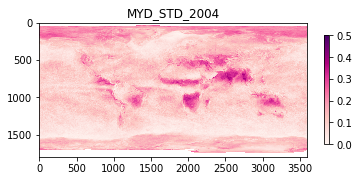

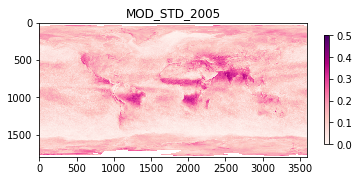

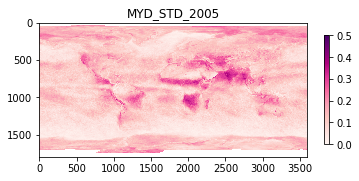

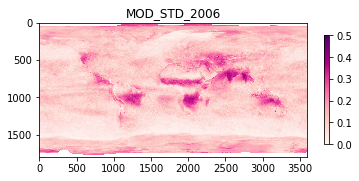

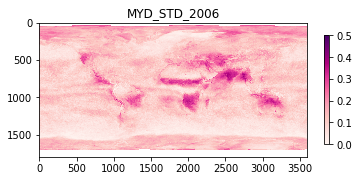

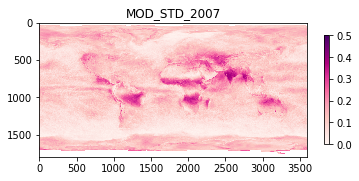

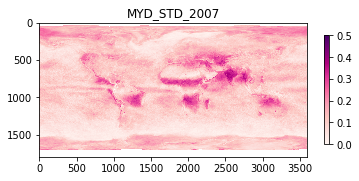

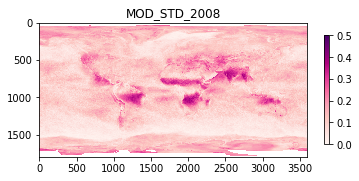

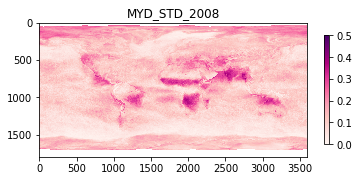

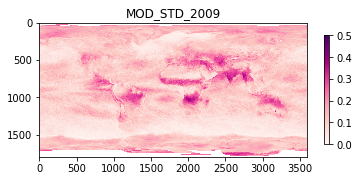

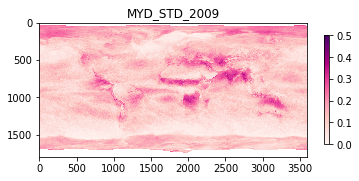

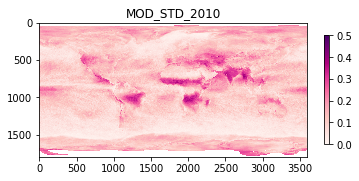

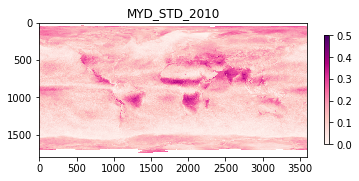

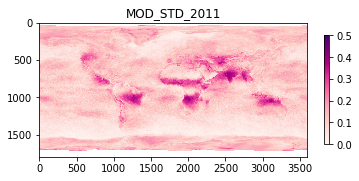

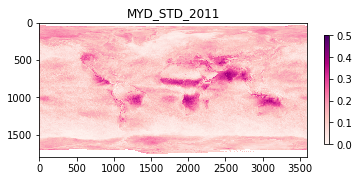

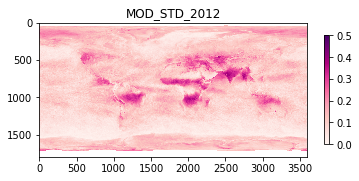

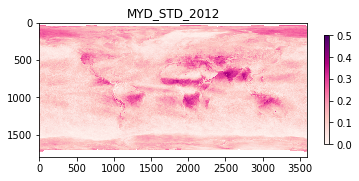

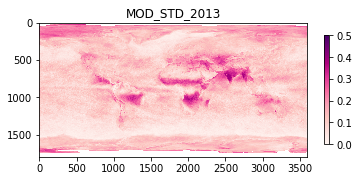

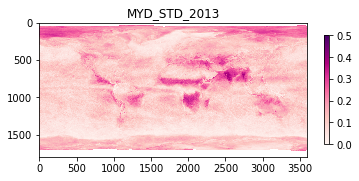

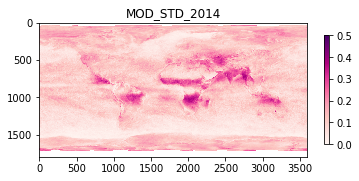

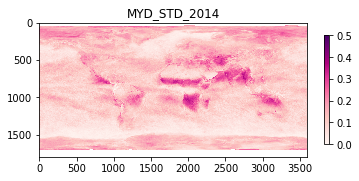

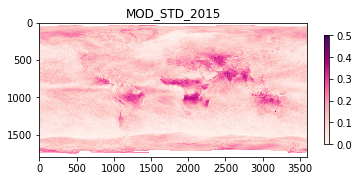

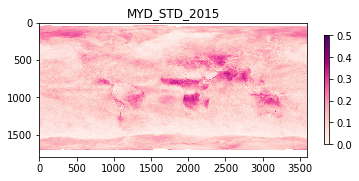

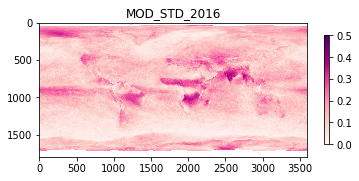

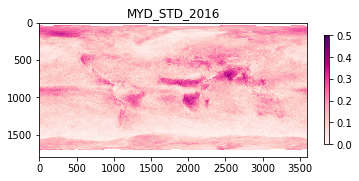

In [20]:
for _,i in enumerate(annualcloud_std):
    plt.figure()
    mask = (i[0]==0)|(i[0]>10)
    i[0][mask]=np.nan
    plt.imshow(i[0],vmin=0, vmax=0.5, interpolation='None', cmap=plt.get_cmap('RdPu'))
    plt.colorbar(shrink=0.5)
    plt.title('MOD_STD_%d'%years[_])
    plt.savefig('image/MOD_STD_%d.png'%years[_])
    plt.figure()
    mask = (i[1]==0)|(i[1]>10)
    i[1][mask]=np.nan
    plt.imshow(i[1],vmin=0, vmax=0.5, interpolation='None', cmap=plt.get_cmap('RdPu'))
    plt.colorbar(shrink=0.5)
    plt.title('MYD_STD_%d'%years[_])
    plt.savefig('image/MYD_STD_%d.png'%years[_])

In [21]:
#!convert -delay 50 -loop 0 image/MYD_STD_*.png image/MYD_STD.gif

In [22]:
#!convert -delay 50 -loop 0 image/MOD_STD_*.png image/MOD_STD.gif

![](image/MOD_STD.gif)
![](image/MYD_STD.gif)

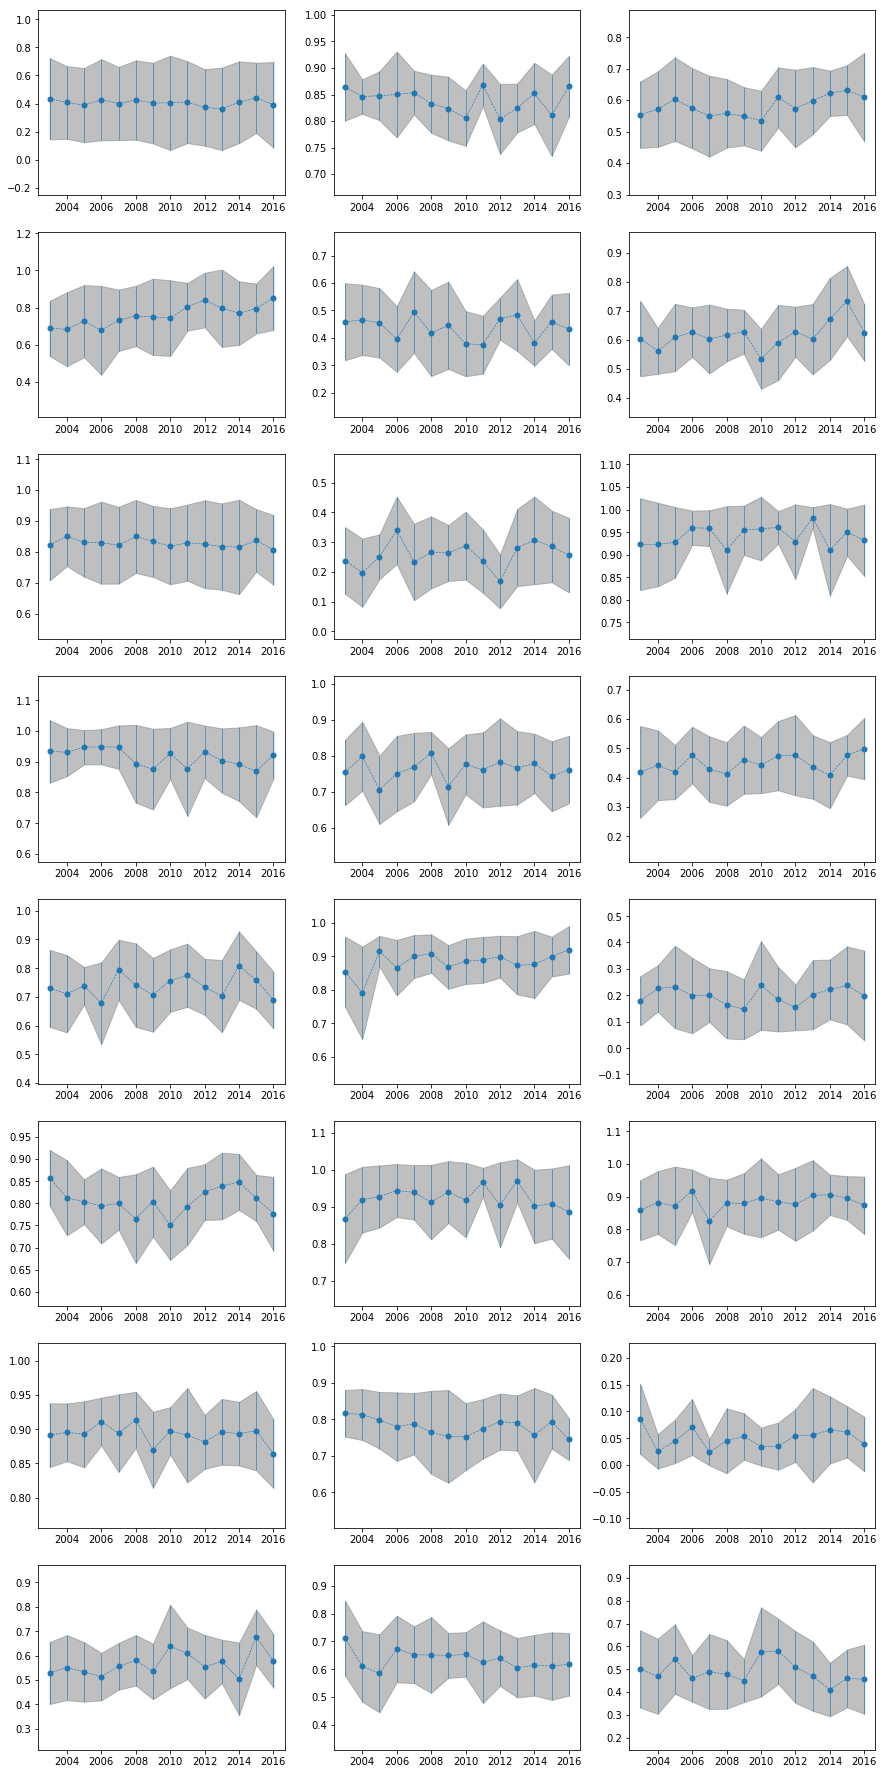

In [23]:
#random choose some pixels and see the changes
# of cloud fraction and the std over 14 years from MOD
indx, indy = np.random.choice(range(1800), 50), np.random.choice(range(3600), 50)
chosen = annualcloud[:,0,indx, indy]
chosen_std = annualcloud_std[:,0, indx, indy]
ma_ = np.all(chosen<=1, axis=0)
fig,ax = plt.subplots(ncols=3, nrows=8, figsize=(15,32))
for j,i in enumerate(np.where(ma_)[0][:24]):    
    ax.ravel()[j].errorbar(range(2003,2017),chosen[:,i], yerr=chosen_std[:,i], lw=0.6, mew=0, fmt='--o')
    ax.ravel()[j].fill_between(range(2003,2017), chosen[:,i]+chosen_std[:,i], chosen[:,i]-chosen_std[:,i], color='grey', alpha=0.5)
    ax.ravel()[j].set_ylim((chosen[:,i]-1.96*chosen_std[:,i]).min(), (chosen[:,i]+1.96*chosen_std[:,i]).max())

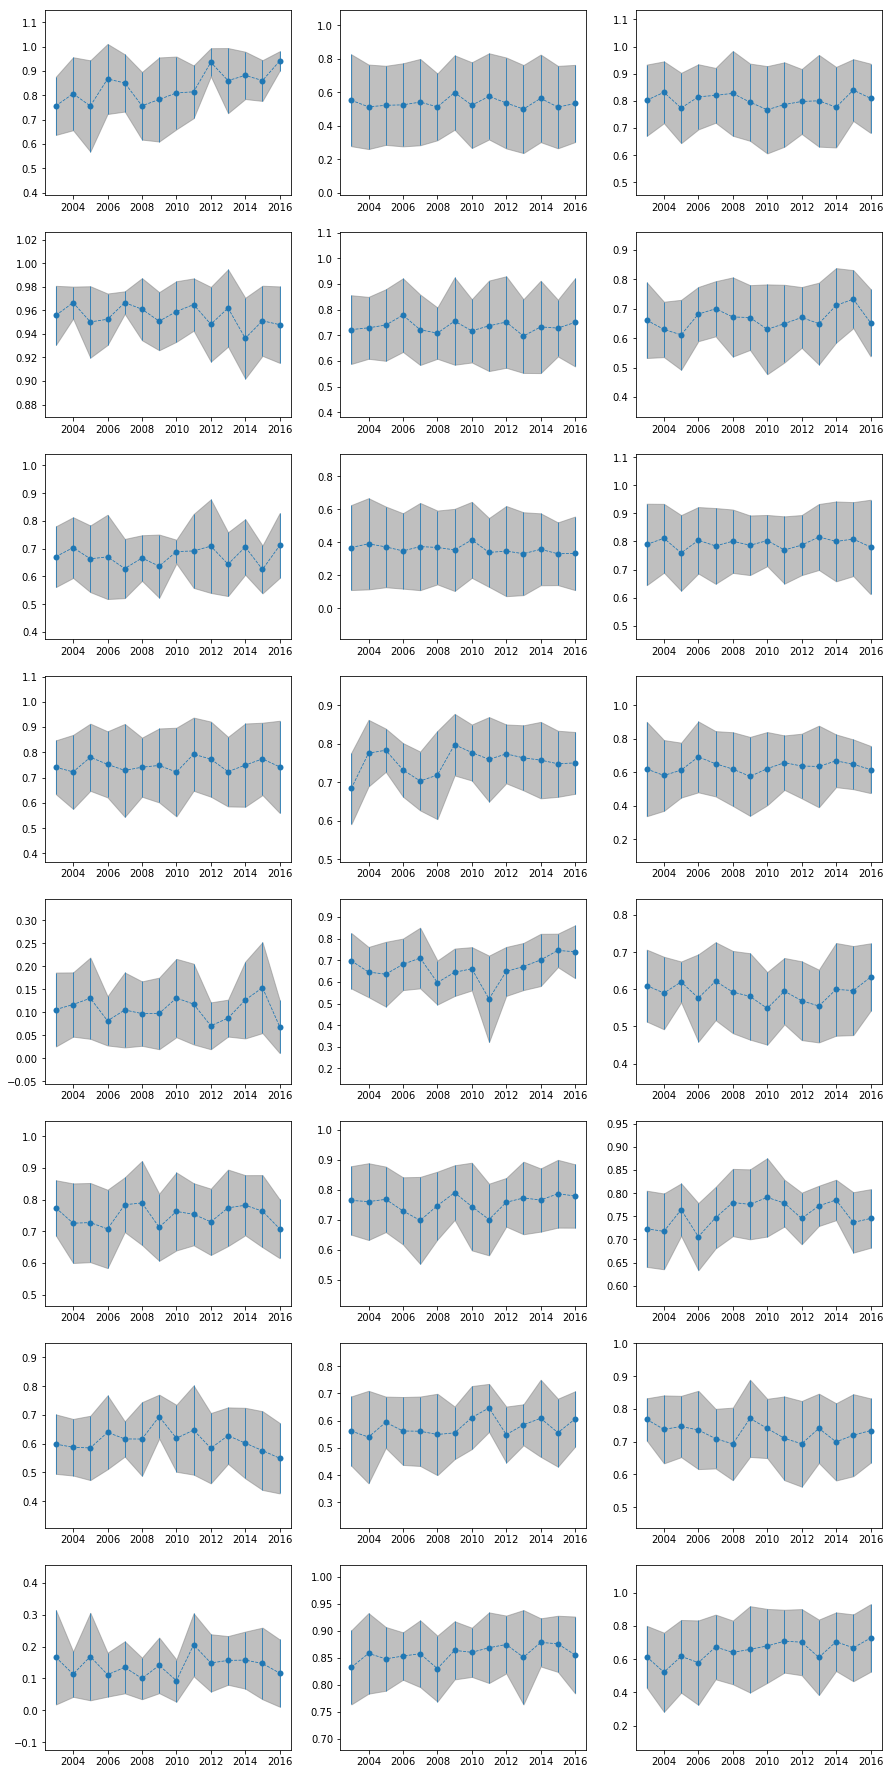

In [24]:
#random choose some pixels and see the changes
# of cloud fraction and the std over 14 years from MYD
indx, indy = np.random.choice(range(1800), 50), np.random.choice(range(3600), 50)
chosen = annualcloud[:,1,indx, indy]
chosen_std = annualcloud_std[:,1, indx, indy]
ma_ = np.all(chosen<=1, axis=0)
fig,ax = plt.subplots(ncols=3, nrows=8, figsize=(15,32))
for j,i in enumerate(np.where(ma_)[0][:24]):    
    ax.ravel()[j].errorbar(range(2003,2017),chosen[:,i], yerr=chosen_std[:,i], lw=0.8, mew=0, fmt='--o')
    ax.ravel()[j].fill_between(range(2003,2017), chosen[:,i]+chosen_std[:,i], chosen[:,i]-chosen_std[:,i], color='grey', alpha=0.5)
    ax.ravel()[j].set_ylim((chosen[:,i]-1.96*chosen_std[:,i]).min(), (chosen[:,i]+1.96*chosen_std[:,i]).max())

So the changes over 14 years is not that obvious (the cloud fraction and their associated std), so we can use the 14 years cloud fraction to get an mean cloud fraction all over the world...

In [7]:
world_cloud_mean = np.mean(cloud, axis=(0,2))
world_cloud_std = np.std(cloud, axis=(0,2))

In [8]:
world_cloud_mean_mod, world_cloud_mean_myd = world_cloud_mean
world_cloud_std_mod, world_cloud_std_myd = world_cloud_std

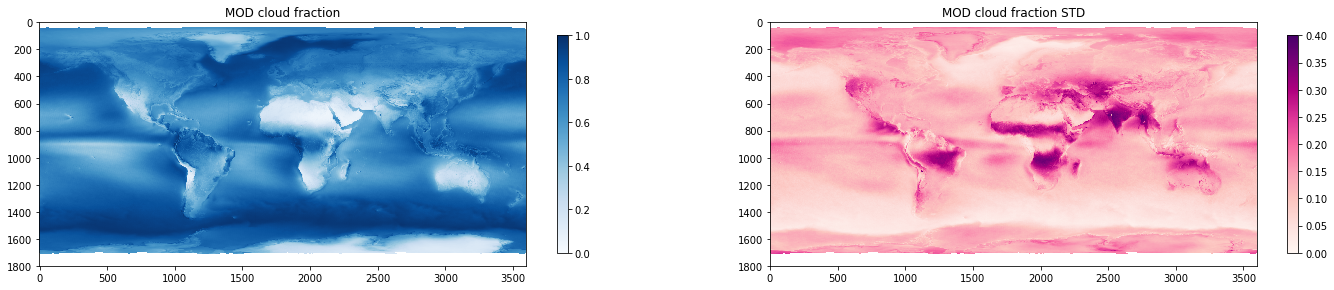

In [12]:
import numpy.ma as ma
# mod cloud fraction over 14 years and std
mask = world_cloud_mean_mod>1
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_mod, mask=mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=1)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('MOD cloud fraction')
im2 = ax[1].imshow(ma.array(world_cloud_std_mod, mask=mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=0.4)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('MOD cloud fraction STD')

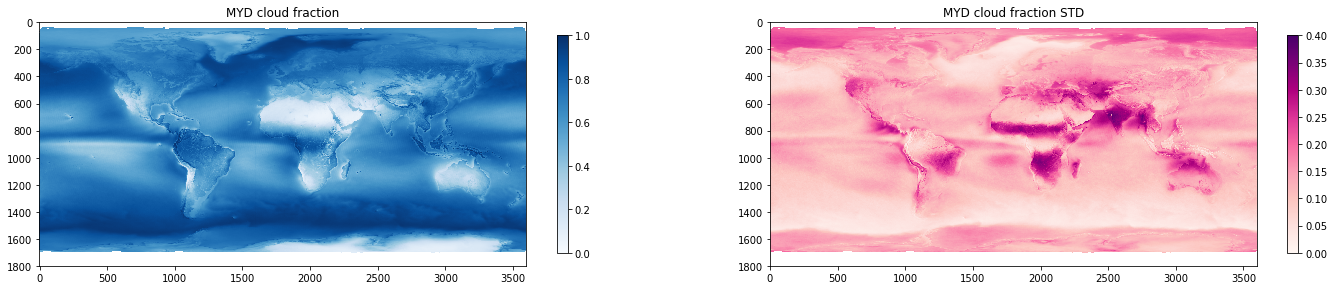

In [13]:
# myd cloud fraction over 14 years and std
mask = world_cloud_mean_myd>1
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_myd, mask=mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=1)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('MYD cloud fraction')
im2 = ax[1].imshow(ma.array(world_cloud_std_myd, mask=mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=0.4)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('MYD cloud fraction STD')

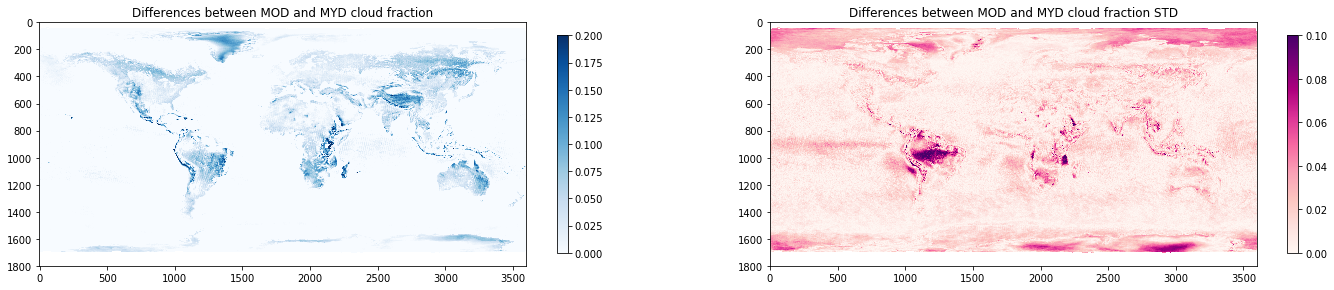

In [14]:
mask = (world_cloud_mean_myd>1)|(world_cloud_mean_mod>1)
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_myd-world_cloud_mean_mod, mask=mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=0.2)
ax[0].set_title('Differences between MOD and MYD cloud fraction')
fig.colorbar(im1, ax=ax[0],shrink=0.5)
im2 = ax[1].imshow(ma.array(abs(world_cloud_std_myd-world_cloud_std_mod), mask=mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=0.1)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('Differences between MOD and MYD cloud fraction STD')

To compute the approximated number of clear days per year, we simply times the mean annual cloud fraction by 365.

In [15]:
clear_days_mean_mod = world_cloud_mean_mod*365
clear_days_std_mod = world_cloud_std_mod*365

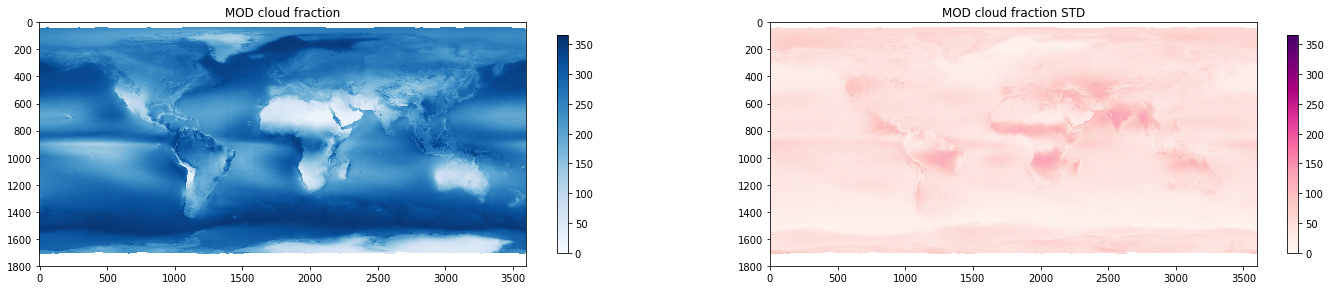

In [16]:
import numpy.ma as ma
# mod cloud fraction over 14 years and std
mask = world_cloud_mean_mod>1
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_mod*365, mask=mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=365)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('MOD cloud fraction')
im2 = ax[1].imshow(ma.array(world_cloud_std_mod*365, mask=mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=365)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('MOD cloud fraction STD')

#### Global land cover

We do not need the ocean part, so find a mask to mask out the ocean. Data is taken from [ESA GlobCover Portal](http://due.esrin.esa.int/page_globcover.php), and interpolated to 10 km resolution with nearest neighbour method.

In [17]:
g = gdal.Open('data/global_land_cover.tif')# data from 
print g.GetGeoTransform()
lc = g.ReadAsArray()

(-180.0013888888889, 0.1, 0.0, 90.00138888888888, 0.0, -0.1)


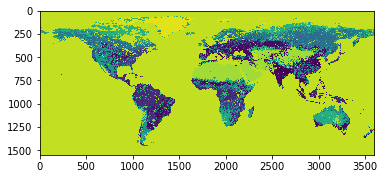

In [18]:
plt.imshow(lc)

In [19]:
np.unique(lc)# spesfic number corresponding to the classes

array([ 11,  14,  20,  30,  40,  50,  60,  70,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230], dtype=uint8)

| Value | Label                                                                                                                          | Red | Green | Blue |
|-------|--------------------------------------------------------------------------------------------------------------------------------|-----|-------|------|
| 11    | Post-flooding or irrigated croplands (or aquatic)                                                                              | 170 | 240   | 240  |
| 14    | Rainfed croplands                                                                                                              | 255 | 255   | 100  |
| 20    | Mosaic cropland (50-70%) / vegetation (grassland/shrubland/forest) (20-50%)                                                    | 220 | 240   | 100  |
| 30    | Mosaic vegetation (grassland/shrubland/forest) (50-70%) / cropland (20-50%)                                                    | 205 | 205   | 102  |
| 40    | Closed to open (>15%) broadleaved evergreen or semi-deciduous forest (>5m)                                                     | 0   | 100   | 0    |
| 50    | Closed (>40%) broadleaved deciduous forest (>5m)                                                                               | 0   | 160   | 0    |
| 60    | Open (15-40%) broadleaved deciduous forest/woodland (>5m)                                                                      | 170 | 200   | 0    |
| 70    | Closed (>40%) needleleaved evergreen forest (>5m)                                                                              | 0   | 60    | 0    |
| 90    | Open (15-40%) needleleaved deciduous or evergreen forest (>5m)                                                                 | 40  | 100   | 0    |
| 100   | Closed to open (>15%) mixed broadleaved and needleleaved forest (>5m)                                                          | 120 | 130   | 0    |
| 110   | Mosaic forest or shrubland (50-70%) / grassland (20-50%)                                                                       | 140 | 160   | 0    |
| 120   | Mosaic grassland (50-70%) / forest or shrubland (20-50%)                                                                       | 190 | 150   | 0    |
| 130   | Closed to open (>15%) (broadleaved or needleleaved, evergreen or deciduous) shrubland (<5m)                                    | 150 | 100   | 0    |
| 140   | Closed to open (>15%) herbaceous vegetation (grassland, savannas or lichens/mosses)                                            | 255 | 180   | 50   |
| 150   | Sparse (<15%) vegetation                                                                                                       | 255 | 235   | 175  |
| 160   | Closed to open (>15%) broadleaved forest regularly flooded (semi-permanently or temporarily) - Fresh or brackish water         | 0   | 120   | 90   |
| 170   | Closed (>40%) broadleaved forest or shrubland permanently flooded - Saline or brackish water                                   | 0   | 150   | 120  |
| 180   | Closed to open (>15%) grassland or woody vegetation on regularly flooded or waterlogged soil - Fresh, brackish or saline water | 0   | 220   | 130  |
| 190   | Artificial surfaces and associated areas (Urban areas >50%)                                                                    | 195 | 20    | 0    |
| 200   | Bare areas                                                                                                                     | 255 | 245   | 215  |
| 210   | Water bodies                                                                                                                   | 0   | 70    | 200  |
| 220   | Permanent snow and ice                                                                                                         | 255 | 255   | 255  |
| 230   | No data (burnt areas, clouds,…)                                                                                                | 0   | 0     | 0    |

In [20]:
mask = lc==210# generate a mask of water

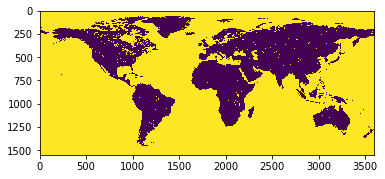

In [21]:
plt.imshow(mask, interpolation='None')# but we have alse masked out the water body inside the land.

In [22]:
# so a binary dilation and a errosion 
# are used to keep in water body inside the land
from scipy import ndimage
struct = np.ones((3,3)).astype(bool)
dia = ndimage.binary_dilation(~mask, structure=struct, iterations=7)
ero = ndimage.binary_erosion(dia, structure=struct, iterations=7)

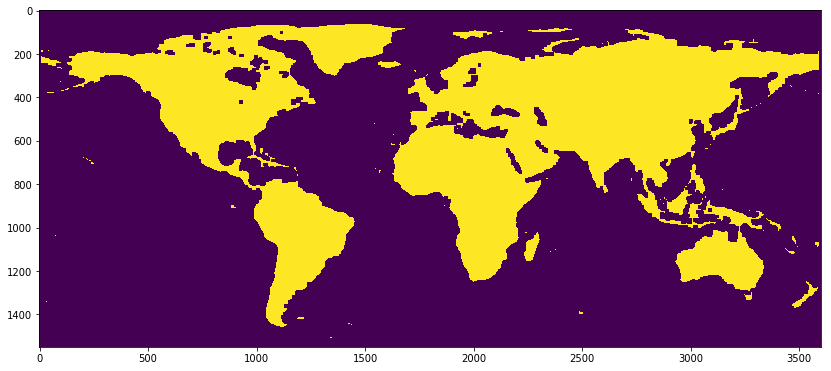

In [23]:
plt.figure(figsize=(14,14))
plt.imshow(ero, interpolation='None')

#### GSHHG dataset

But this way, it removes many narrow strait, so we need a proper continent outlines...So we fond this [GSHHG (A Global Self-consistent, Hierarchical, High-resolution Geography Database)](http://www.soest.hawaii.edu/wessel/gshhg/), download the shp file and unzip it into **_'/data'_** folder. And the GSHHS (Global Self-consistent Hierarchical High-resolution Shorelines) is what we want to get the boarder of lands...

In [24]:
ls ./data/GSHHS_shp

c/                f/  i/  LICENSE.TXT  README.TXT
COPYING.LESSERv3  h/  l/  README2.TXT  SHAPEFILES.TXT


In [25]:
!head --l 40 data/GSHHS_shp/SHAPEFILES.TXT

So what we want is the **_'f'_** (full resolution)--**_Level 1 and Level 6:_** 
``` bash
ls data/GSHHS_shp/f/GSHHS_f_L1.shp
ls data/GSHHS_shp/f/GSHHS_f_L6.shp
```
We need to use combine these two shapefiles into file shapefile using [`ogr2ogr`](http://www.gdal.org/ogr2ogr.html), and then rasterize the combined shapefile into a raster image with [`gdal_rasterize`](http://www.gdal.org/gdal_rasterize.html) to get a mask out of it..

In [26]:
%%bash 
# run code in bash enviroment
# copy the file into merged shapefile
# merge the other one into merged shapefile
ogr2ogr -f 'ESRI Shapefile' data/GSHHS_shp/f/merge.shp data/GSHHS_shp/f/GSHHS_f_L1.shp 
ogr2ogr -f 'ESRI Shapefile' -update -append data/GSHHS_shp/f/merge.shp data/GSHHS_shp/f/GSHHS_f_L6.shp -nln merge 
# rasteriszing
# forcring it start from -180 and -90
# though the shapefile dose not covering that extend
# set the pixel resolution to be 0.1 degree to match 
# modis cloud fraction resolution
gdal_rasterize -te -180 -90 180 90 -tr 0.1 0.1 -burn 255 data/GSHHS_shp/f/merge.shp data/GSHHS_shp/f/merge.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [27]:
merged = gdal.Open('data/GSHHS_shp/f/merge.tif').ReadAsArray()

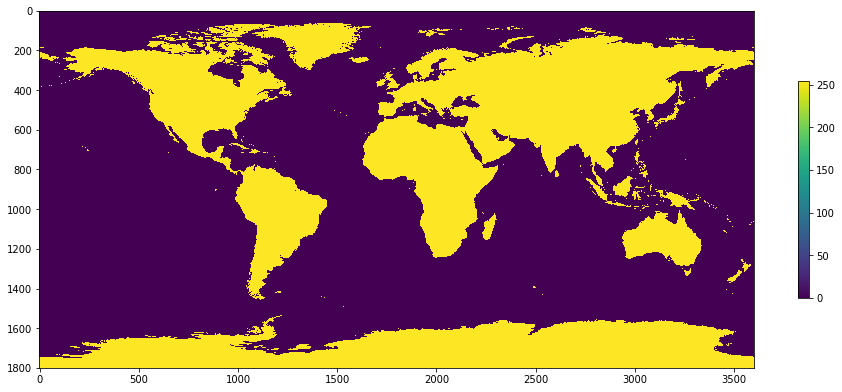

In [28]:
merged.shape
plt.figure(figsize=(16,8))
plt.imshow(merged, interpolation='None')
plt.colorbar(shrink=0.5)

Now we get a better global land cover map....

In [29]:
land_mask = merged==255

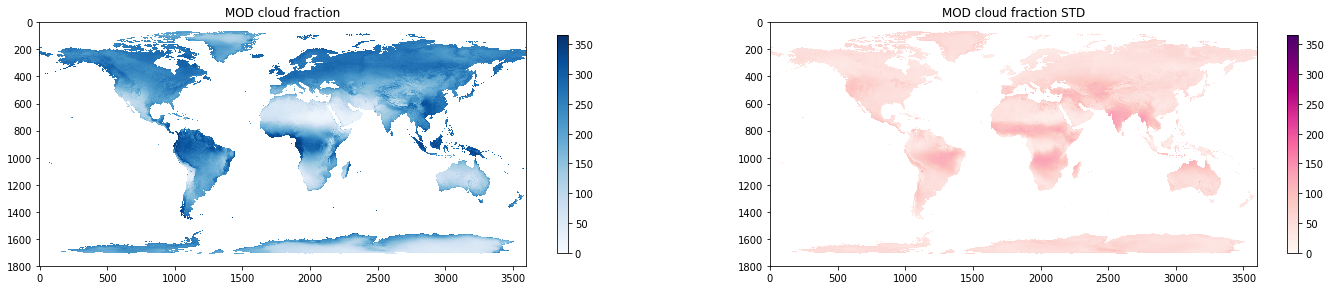

In [30]:
# mod cloud fraction over 14 years and std
mask = (world_cloud_mean_mod<1)&(land_mask)
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_mod*365, mask=~mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=365)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('MOD cloud fraction')
im2 = ax[1].imshow(ma.array(world_cloud_std_mod*365, mask=~mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=365)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('MOD cloud fraction STD')

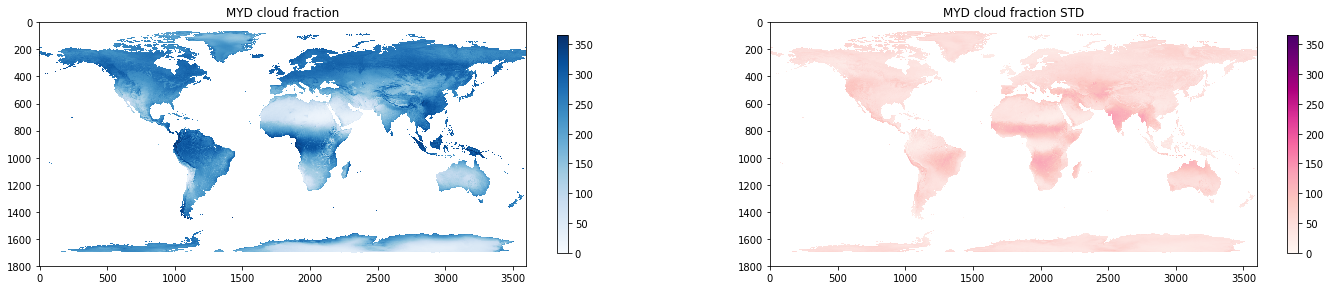

In [31]:
# mod cloud fraction over 14 years and std
mask = (world_cloud_mean_myd<1)&(land_mask)
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(ma.array(world_cloud_mean_myd*365, mask=~mask), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=365)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('MYD cloud fraction')
im2 = ax[1].imshow(ma.array(world_cloud_std_myd*365, mask=~mask), interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=365)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('MYD cloud fraction STD')

The 14 years mean of annual cloud fraction is produced and the std is around 0.1-0.2 for most area and 0.3-0.4 for those area mostly cloudy over thes whole year.

In [32]:
mask = (world_cloud_mean_mod<1)&(land_mask)
mod_clear = ma.array(world_cloud_mean_mod*365, mask=~mask)
mod_clear_std = ma.array(world_cloud_std_mod*365, mask=~mask)
mask = (world_cloud_mean_myd<1)&(land_mask)
myd_clear = ma.array(world_cloud_mean_myd*365, mask=~mask)
myd_clear_std = ma.array(world_cloud_std_myd*365, mask=~mask)

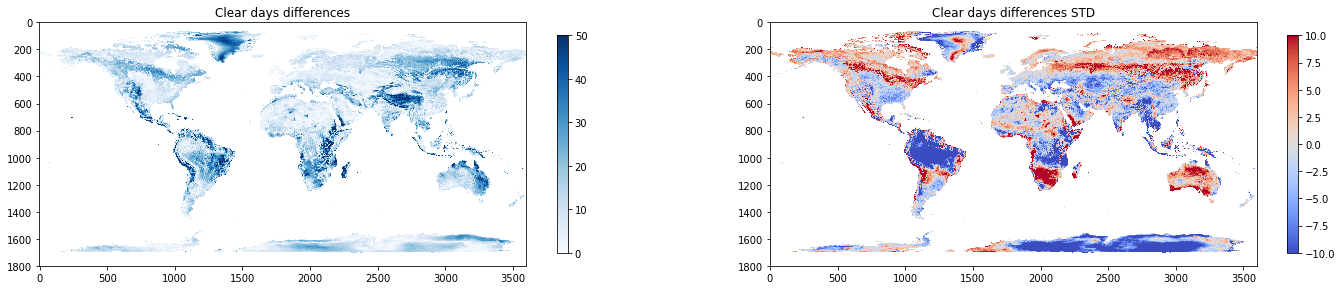

In [33]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(24,8))
im1 = ax[0].imshow(abs(mod_clear-myd_clear), interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=50)
fig.colorbar(im1, ax=ax[0],shrink=0.5)
ax[0].set_title('Clear days differences')
im2 = ax[1].imshow(myd_clear_std-mod_clear_std, interpolation='None', cmap=plt.get_cmap('coolwarm'), vmin=-10, vmax=10)
fig.colorbar(im2, ax=ax[1],shrink=0.5)
ax[1].set_title('Clear days differences STD')

The difference between the MOD and MYD annual clear days is actually not small at al, so a better way to combine these two data set is use the mean of these two datasets weighted by their associated std. 

The weighted mean is:
$$\bar x^* = \frac{\displaystyle\sum_{i=1}^{N} \omega_i x_i}{\displaystyle\sum_{i=1}^{N} \omega_i}$$

The weighted std is:
$$\bar s^* = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} \omega_i (x_i-\bar x^*)^2}{\frac{(M-1)}{M}\displaystyle\sum_{i=1}^{N} \omega_i}}$$

where: 

$N$ is the number of observations.

$M$ is the number of nonzero weights.

$\omega_i$ are the weights

$x_i$ are the observations.

$\bar x^*$ is the weighted mean.

$\bar s^*$ is the weighted std.


In [35]:
combined = (mod_clear*mod_clear_std+myd_clear*myd_clear_std)/(mod_clear_std+myd_clear_std)
combined_std = np.sqrt((((mod_clear-combined)**2)*mod_clear_std+((myd_clear-combined)**2)*myd_clear_std)/(mod_clear_std+myd_clear_std))

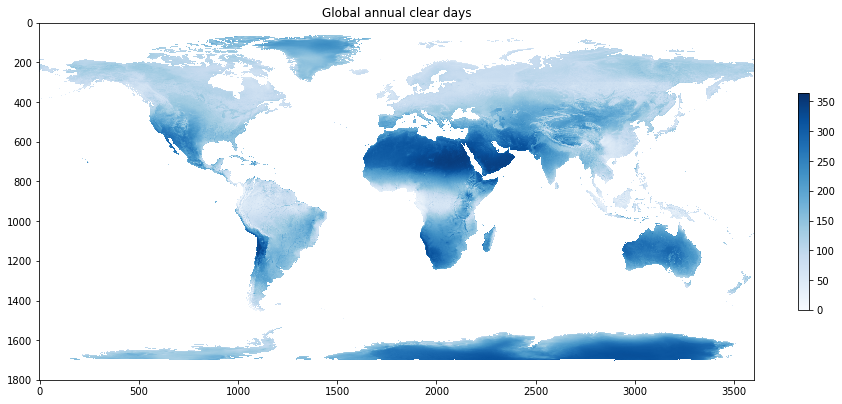

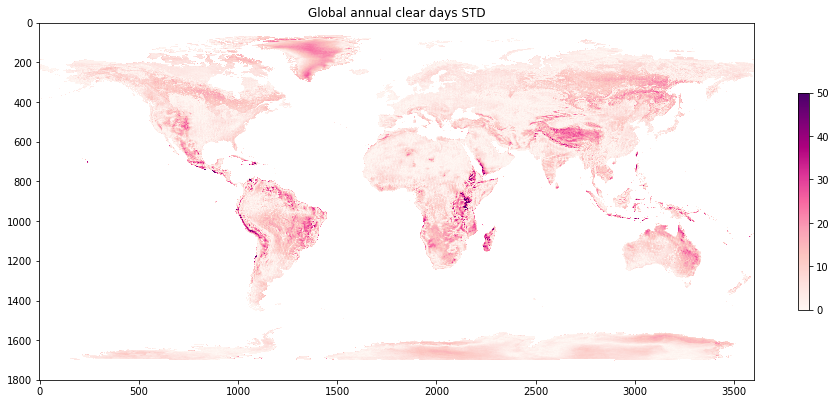

In [36]:
plt.figure(figsize=(16,8))
plt.imshow(365-combined, interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=365)
plt.colorbar(shrink=0.5)
plt.title('Global annual clear days')
plt.figure(figsize=(16,8))
plt.imshow(combined_std, interpolation='None', cmap=plt.get_cmap('RdPu'), vmin=0, vmax=50)
plt.colorbar(shrink=0.5)
plt.title('Global annual clear days STD')

#### GDD

What we really concern about is the growing days of vegetation, as in those period the earth surface is undergoing most of the changes. Monitoring the growing of vegetation is the mojor part of work of remote sensing, so we want to get the number of clear days within the growing period. Here we use the temporature as an indication of growing. By simply incoporating the [growing degree days (GDD)](http://www.farmwest.com/node/936) or [GDD](https://en.wikipedia.org/wiki/Growing_degree-day), we set the maximum of Tmax to be 30 and minimum of Tmin to be 5:

$$
GDD = \frac{T_{max}+T_{min}}{2} -T_{base}
$$

We need some temprature data now, and we use the [Climate Prediction Center (CPC)](https://www.esrl.noaa.gov/psd/data/gridded/data.cpc.globaltemp.html) Global Temperature Daily data and the CPC's [FTP directories](ftp://ftp.cdc.noaa.gov/Datasets/cpc_global_temp/).

In [40]:
# taken from https://stackoverflow.com/questions/22676/how-do-i-download-a-file-over-http-using-python
ftp = 'ftp://ftp.cdc.noaa.gov/Datasets/cpc_global_temp/%s.%d.nc'
for t in ['tmin', 'tmax']:
    for year in range(2016, 2017):
        url = ftp%(t,year)

        file_name = url.split('/')[-1]
        if os.path.isfile('data/'+file_name):
            print 'Finished %s'%file_name
        else:
            u = urllib2.urlopen(url)
            f = open('data/'+file_name, 'wb')
            meta = u.info()
            file_size = int(meta.getheaders("Content-Length")[0])
            print "Downloading: %s Bytes: %s" % (file_name, file_size)
            file_size_dl = 0
            block_sz = file_size/10
            while True:
                buffer = u.read(block_sz)
                if not buffer:
                    break
                file_size_dl += len(buffer)
                f.write(buffer)
                status = "%d%%" % (file_size_dl * 100. / file_size)
                print status,
            print 'Finished %s'%file_name
            f.close()

Finished tmin.2016.nc
Finished tmax.2016.nc


In [41]:
tmin = gdal.Open('data/tmin.2016.nc').ReadAsArray()
tmax = gdal.Open('data/tmax.2016.nc').ReadAsArray()

In [42]:
tmin[tmin<5]=5
tmin[tmin>30]=30
tmax[tmax<5]=5
tmax[tmax>30]=30

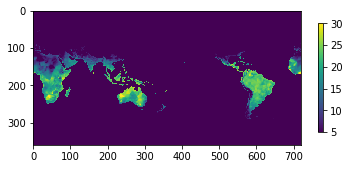

In [43]:
plt.imshow(tmin[0], interpolation='None')
plt.colorbar(shrink=0.5)

In [44]:
gdd = (tmax+tmin)/2. - 5

In [62]:
# gdd over each month
for i in range(0,365):
    plt.figure()
    plt.imshow(gdd[i])
    plt.colorbar(shrink=0.5)
    plt.title('DOY %03d'%(i+1))
    plt.savefig('image/gdd%03d.png'%i)
    plt.close()

In [63]:
!convert -delay 20 -loop 0 image/gdd*.png image/gdd.gif

![](image/gdd.gif)

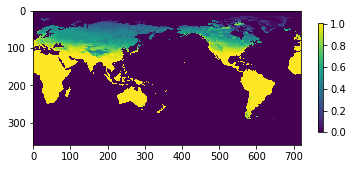

In [64]:
plt.imshow(sum(gdd>0)/365.)
plt.colorbar(shrink=0.5)

In [85]:
expaned_grow = grow_prop.repeat(5, axis=0).repeat(5, axis=1)# By repeating the data to get the same size 

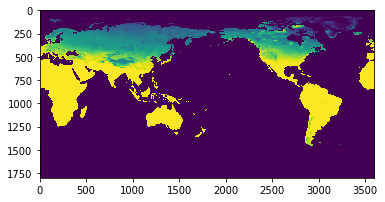

In [86]:
plt.imshow(expaned_grow)

This two datasets have different geographic starting coordinates, so we need to rearange the expended gdd data...

In [97]:
rearanged = np.zeros_like(expaned_grow)
rearanged[:,0:1800] = expaned_grow[:, 1800:]
rearanged[:, 1800:] = expaned_grow[:, 0:1800]

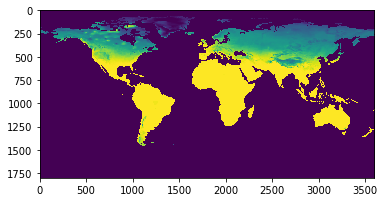

In [100]:
plt.imshow(rearanged, interpolation='None')

#### Combined

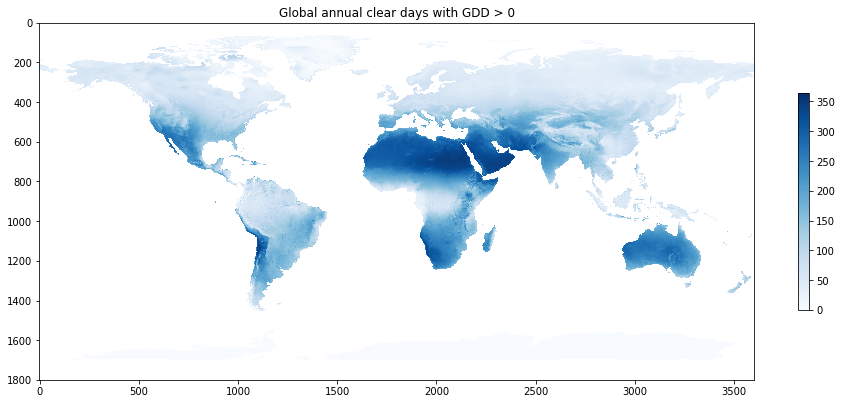

In [103]:
grow_prop = sum(gdd>0)/365.
plt.figure(figsize=(16,8))
plt.imshow((365-combined)*rearanged, interpolation='None', cmap=plt.get_cmap('Blues'), vmin=0, vmax=365)
plt.colorbar(shrink=0.5)
plt.title('Global annual clear days with GDD > 0')

We can also apply the GDD of specific plants to the global map with some examples from wiki:

[GDD for plant development](https://en.wikipedia.org/wiki/Growing_degree-day):

| Common name         | Latin name             | Number of growing degree days baseline 10 °C                        |
|---------------------|------------------------|---------------------------------------------------------------------|
| Witch-hazel         | Hamamelis spp.         | begins flowering at <1 GDD                                          |
| Red maple           | Acer rubrum            | begins flowering at 1-27 GDD                                        |
| Forsythia           | Forsythia spp.         | begin flowering at 1-27 GDD                                         |
| Sugar maple         | Acer saccharum         | begin flowering at 1-27 GDD                                         |
| Norway maple        | Acer platanoides       | begins flowering at 30-50 GDD                                       |
| White ash           | Fraxinus americana     | begins flowering at 30-50 GDD                                       |
| Crabapple           | Malus spp.             | begins flowering at 50-80 GDD                                       |
| Common Broom        | Cytisus scoparius      | begins flowering at 50-80 GDD                                       |
| Horsechestnut       | Aesculus hippocastanum | begin flowering at 80-110 GDD                                       |
| Common lilac        | Syringa vulgaris       | begin flowering at 80-110 GDD                                       |
| Beach plum          | Prunus maritima        | full bloom at 80-110 GDD                                            |
| Black locust        | Robinia pseudoacacia   | begins flowering at 140-160 GDD                                     |
| Catalpa             | Catalpa speciosa       | begins flowering at 250-330 GDD                                     |
| Privet              | Ligustrum spp.         | begins flowering at 330-400 GDD                                     |
| Elderberry          | Sambucus canadensis    | begins flowering at 330-400 GDD                                     |
| Purple loosestrife  | Lythrum salicaria      | begins flowering at 400-450 GDD                                     |
| Sumac               | Rhus typhina           | begins flowering at 450-500 GDD                                     |
| Butterfly bush      | Buddleia davidii       | begins flowering at 550-650 GDD                                     |
| Corn (maize)        | Zea mays               | 800 to 1400 GDD to crop maturity                                    |
| Dry beans           | Phaseolus vulgaris     | 1100-1300 GDD to maturity depending on cultivar and soil conditions |
| Sugar Beet          | Beta vulgaris          | 130 GDD to emergence and 1400-1500 GDD to maturity                  |
| Barley              | Hordeum vulgare        | 125-162 GDD to emergence and 1290-1540 GDD to maturity              |
| Wheat (Hard Red)    | Triticum aestivum      | 143-178 GDD to emergence and 1550-1680 GDD to maturity              |
| Oats                | Avena sativa           | 1500-1750 GDD to maturity                                           |
| European Corn Borer | Ostrinia nubilalis     | 207 - Emergence of first spring moths                               |

More exporing can be done with some easy addaption on the data and equations explained above...